In [1]:
import os, shutil

original_dataset_dir = r'C:\Users\pgbpr\Documents\Verusen\keras\dogs-vs-cats'
original_train_dir = r'C:\Users\pgbpr\Documents\Verusen\keras\dogs-vs-cats\train'
base_dir = r'C:\Users\pgbpr\Documents\Verusen\keras\dogs-vs-cats\small'
# os.mkdir(base_dir)

In [2]:
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

In [3]:
def mkdir(path1, path2):
    temp_str = os.path.join(path1, path2)
#     os.mkdir(temp_str)
    return temp_str

train_cats_dir = mkdir(train_dir, 'cats')
train_dogs_dir = mkdir(train_dir, 'dogs')
validation_cats_dir = mkdir(validation_dir, 'cats')
validation_dogs_dir = mkdir(validation_dir, 'dogs')
test_cats_dir = mkdir(test_dir, 'cats')
test_dogs_dir = mkdir(test_dir, 'dogs')

In [4]:
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_train_dir, fname)
#     dst = os.path.join(train_cats_dir, fname)
#     shutil.copyfile(src, dst)

# fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_train_dir, fname)
#     dst = os.path.join(validation_cats_dir, fname)
#     shutil.copyfile(src, dst)

# fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_train_dir, fname)
#     dst = os.path.join(test_cats_dir, fname)
#     shutil.copyfile(src, dst)

In [5]:
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_train_dir, fname)
#     dst = os.path.join(train_dogs_dir, fname)
#     shutil.copyfile(src, dst)

# fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_train_dir, fname)
#     dst = os.path.join(validation_dogs_dir, fname)
#     shutil.copyfile(src, dst)

# fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_train_dir, fname)
#     dst = os.path.join(test_dogs_dir, fname)
#     shutil.copyfile(src, dst)

In [6]:
print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(train_dogs_dir)))
print(len(os.listdir(validation_cats_dir)))
print(len(os.listdir(validation_dogs_dir)))
print(len(os.listdir(test_cats_dir)))
print(len(os.listdir(test_dogs_dir)))

1000
1000
500
500
500
500


### Building network
Ok, that was "fun". Now we have all the images where we need them.
* General Structure : Conv2D (relu), then MaxPooling2D
* Network will be made larger - to augment the capacity of the network and to further reduce the size of the feature maps so they aren't overly large when you reach the flatten layer.
    * Start with inputs of size 150 x 150, end up with feature maps of size 7 x 7


In [7]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flat

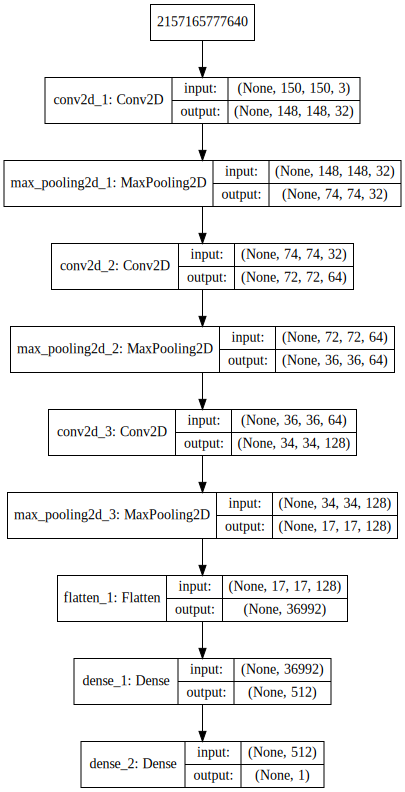

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [9]:
# Compile Model
from keras import optimizers

model.compile(loss='binary_crossentropy', 
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

### Data Preprocessing
1. Read the picture files
2. Decode the JPEG content to RGB grids of pixels
3. Convert these into floating-point tensors
4. Rescale the pixel values (0-255) to [0, 1]


In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

validation_generator = train_datagen.flow_from_directory(
validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100, # After having run for this number of gradient descent steps, fit on the next epoch
epochs=30,
validation_data=validation_generator,
validation_steps=50) # How many batches to draw on the validation generator for evaluation
model.save('cats_and_dogs_small_1.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 29s 290ms/step - loss: 0.7040 - acc: 0.5300 - val_loss: 0.6474 - val_acc: 0.6560
Epoch 2/30
100/100 [==============================] - 9s 93ms/step - loss: 0.6197 - acc: 0.6560 - val_loss: 0.6107 - val_acc: 0.6750
Epoch 3/30
100/100 [==============================] - 10s 101ms/step - loss: 0.5585 - acc: 0.7130 - val_loss: 0.5889 - val_acc: 0.6960
Epoch 4/30
100/100 [==============================] - 9s 91ms/step - loss: 0.5106 - acc: 0.7520 - val_loss: 0.6260 - val_acc: 0.6510
Epoch 5/30
100/100 [==============================] - 9s 91ms/step - loss: 0.4626 - acc: 0.7850 - val_loss: 0.6852 - val_acc: 0.6660
Epoch 6/30
100/100 [==============================] - 9s 92ms/step - loss: 0.4270 - acc: 0.8085 - val_loss: 0.5688 - val_acc: 0.7090
Epoch 7/30
100/100 [==============================] - 9s 90ms/step - loss: 0.3851 - acc: 0.8340 - val_loss: 0.5608 - val_acc: 0.7200
Epoch 8/30
100/10

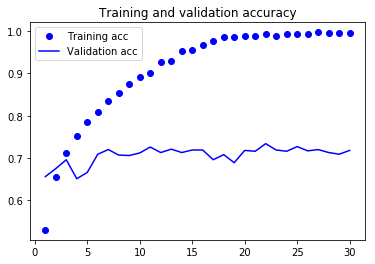

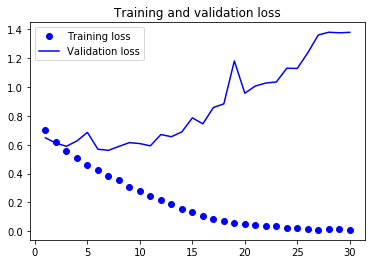

In [13]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Data Augmentation
Used universally when processing images with deep-learning models.

Augmenting the samples via a number of random transformations the yield believable looking images.

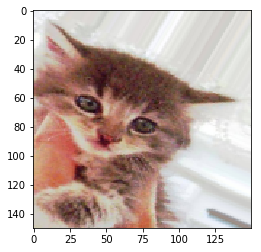

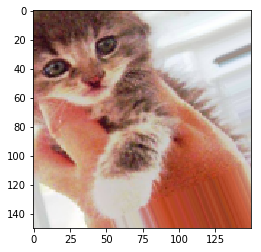

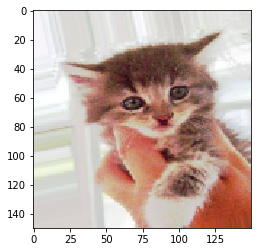

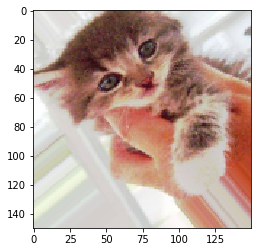

In [15]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3] # Choose 1 image to augment
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

In [17]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                                validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 32s 321ms/step - loss: 0.6927 - acc: 0.5216 - val_loss: 0.7032 - val_acc: 0.5044
Epoch 2/100
100/100 [==============================] - 29s 291ms/step - loss: 0.6786 - acc: 0.5575 - val_loss: 0.6498 - val_acc: 0.5999
Epoch 3/100
100/100 [==============================] - 33s 328ms/step - loss: 0.6616 - acc: 0.6031 - val_loss: 0.6375 - val_acc: 0.6168
Epoch 4/100
100/100 [==============================] - 29s 290ms/step - loss: 0.6436 - acc: 0.6166 - val_loss: 0.6217 - val_acc: 0.6437
Epoch 5/100
100/100 [==============================] - 29s 294ms/step - loss: 0.6311 - acc: 0.6325 - val_loss: 0.6064 - val_acc: 0.6593
Epoch 6/100
100/100 [==============================] - 30s 297ms/step - loss: 0.6133 - acc: 0.6594 - val_loss: 0.5894 - val_acc: 0.6727
Epoch 7/100
100/100 [==============================] - 29s 293ms/step - loss: 0.6060 - acc: 0.6653 -